In [3]:
import os
import io
import requests
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sns
sns.set_style(style='darkgrid')
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import re
%matplotlib inline


In [4]:
rp = pd.read_csv( 'Residential_Permit.csv')
rp.head()

C:\Users\abrah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Status,Street Number,Street Name,Street Suffix,Post-direction,City,State,ZIP code,Added Date,Issue Date,Final Date,Building Area,Declared Valuation,Description,Application Type,Work Type,Use Code,Pre-direction,Location
0,849824,Finaled,22012,BROADWAY,AVE,NaN,CLARKSBURG,MD,20871.0,08/25/2018,10/23/2018,10/08/2019,4894.0,175000.0,Revision 01 - CHANGE HOUSE ELEVATION. THIS O...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,NaN,"22012 BROADWAY AVE\nCLARKSBURG, MD 20871\n(39...."
1,859503,Issued,3500,DUPONT,AVE,NaN,KENSINGTON,MD,20895.0,11/28/2018,10/08/2019,NaN,3473.0,180000.0,Customer Wants To Use ePlans&nbsp;--existing d...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,NaN,"3500 DUPONT AVE\nKENSINGTON, MD 20895\n(39.031..."
2,861649,Issued,5712,RIVER,RD,NaN,BETHESDA,MD,20816.0,12/20/2018,03/27/2019,NaN,5273.0,400000.0,"Customer Wants To Use ePlans,Construct new hom...",BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,NaN,"5712 RIVER RD\nBETHESDA, MD 20816\n(38.970285,..."
3,863379,Finaled,7312,MAPLE,AVE,NaN,TAKOMA PARK,MD,20912.0,01/15/2019,01/22/2019,10/08/2019,392.0,80000.0,New&nbsp;2 story addition on piers built on re...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,NaN,"7312 MAPLE AVE\nTAKOMA PARK, MD 20912\n(38.978..."
4,884895,Finaled,15316,DONNA,DR,NaN,SILVER SPRING,MD,20905.0,08/01/2019,09/09/2019,10/08/2019,175.0,0.0,DECK:&nbsp; 175 SFSHED:&nbsp; 164 SF,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,DECK,NaN,"15316 DONNA DR\nSILVER SPRING, MD 20905\n(39.1..."


In [5]:
rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138715 entries, 0 to 138714
Data columns (total 20 columns):
Permit Number         138715 non-null int64
Status                138715 non-null object
Street Number         137674 non-null object
Street Name           137723 non-null object
Street Suffix         137680 non-null object
Post-direction        15 non-null object
City                  137692 non-null object
State                 137712 non-null object
ZIP code              137657 non-null float64
Added Date            138715 non-null object
Issue Date            134657 non-null object
Final Date            96458 non-null object
Building Area         136286 non-null float64
Declared Valuation    135825 non-null float64
Description           113774 non-null object
Application Type      138715 non-null object
Work Type             138708 non-null object
Use Code              138715 non-null object
Pre-direction         1339 non-null object
Location              137723 non-null o

In [6]:
rp.describe().T

,count,mean,std,min,25%,50%,75%,max
Permit Number,138715.0,525491.774062,2.686235e+06,208669.0,330173.0,495900.0,706291.0,998060004.0
ZIP code,137657.0,20860.782786,3.097519e+02,0.0,20841.0,20871.0,20895.0,21797.0
Building Area,136286.0,1323.900128,3.382334e+03,0.0,216.0,451.0,1386.0,675500.0
Declared Valuation,135825.0,81670.202610,6.608073e+05,-300.0,6590.0,21000.0,95000.0,150000000.0


In [7]:
missing_data = rp.isnull().sum()
missing_data / len(rp) * 100
#find out based on year

Permit Number          0.000000
Status                 0.000000
Street Number          0.750460
Street Name            0.715135
Street Suffix          0.746134
Post-direction        99.989186
City                   0.737483
State                  0.723065
ZIP code               0.762715
Added Date             0.000000
Issue Date             2.925423
Final Date            30.463180
Building Area          1.751072
Declared Valuation     2.083408
Description           17.980031
Application Type       0.000000
Work Type              0.005046
Use Code               0.000000
Pre-direction         99.034711
Location               0.715135
dtype: float64

In [8]:
rp.shape

(138715, 20)

In [9]:
rp1 = rp.rename({"Permit Number":"P_num", "Street Number":"St_number", "Pre-direction": "Pre_d", "Street Name":"St_name", "Street Number":"St_num",
                 "Street Suffix":"St_suf", "Post-direction":"Post_d","ZIP code":"Zip", "Added Date":"A_date",
                 "Issue Date":"I_date","Final Date":"F_date", "Building Area":"Building_area", "Building Area":"Building_area", 
                 "Declared Valuation":"Decl_v", "Description":"Desc", "Application Type":"A_type", "Work Type":"W_type", "Use Code":"U_code"}, axis='columns')

In [10]:
rp1.Status.value_counts()


Finaled      94897
Issued       37457
Open          3973
Stop Work     2388
Name: Status, dtype: int64

In [11]:
rp1.W_type.value_counts()

CONSTRUCT                     66203
ADD                           35188
ALTER                         33767
RESTORE AND / OR REPAIR        2892
FINAL ONLY AP                   506
BUILD FOUNDATION                 78
INSTALL                          58
REPLACE                           5
PLACE                             3
CONSTRUCT SHEETING/SHORING        3
REMOVE AND REPLACE                2
MOVE                              1
DISTURB                           1
INSPECT AND APPROVE               1
Name: W_type, dtype: int64

In [12]:
rp1.U_code.value_counts(ascending=False)

SINGLE FAMILY DWELLING            88958
DECK                              27401
TOWNHOUSE                          8026
SHED                               6809
SWIMMING POOL & FENCE              2155
GARAGE                             1588
RESIDENTIAL ACCESSORYSTRUCTURE     1515
SWIMMING POOL                       987
HOT TUB                             275
HOT TUB & DECK                      215
MODULAR                             197
MISCELLANEOUS STRUCTURE             190
RETAINING WALL                      110
DUPLEX                               96
POOL - ABOVE GROUND                  76
TRAILER                              38
POOL - ABOVE GROUND & FENCE          33
MULTI-FAMILY DWELLING                 9
SALES OFFICE @ MODEL HOME             8
FENCE                                 6
BUSINESS BUILDING                     6
CLERGY HOUSE                          4
SENIOR SINGLE FAMILY DWELLING         4
FARMING TENANT DWELLING               2
OTHER SYSTEMS (GAS/CHEMICAL)          1


In [13]:
#changeing Zip from a float to a string
rp1.Zip = rp1.Zip.fillna(-1)
rp1.Zip = rp1.Zip.astype(str)
rp1.Zip = rp1.Zip.astype(str)
rp1.Zip = rp1.Zip.replace('-1', "Na")
type(rp1.Zip[1])
#what was wrong with this

str

In [14]:
#Changing dates to DateTime
rp1.A_date = pd.to_datetime(rp1.A_date)
rp1.I_date = pd.to_datetime(rp1.I_date)
rp1.F_date = pd.to_datetime(rp1.F_date)
type(rp1.A_date[2])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
Naloc = rp1[rp1.Location.isnull() & rp1.St_num.isnull() & 
            rp1.City.isnull() &  rp1.Zip.isnull()]


In [16]:
R1 = rp1.copy()
R1.dropna(subset=[ 'Location', 'Zip', 'City', 'St_num', 'St_name' ], inplace=True)
R1.shape

(137668, 20)

In [17]:
missing_data3 = R1.isnull().sum()
missing_data3

P_num                 0
Status                0
St_num                0
St_name               0
St_suf               42
Post_d           137653
City                  0
State                 9
Zip                   0
A_date                0
I_date             3770
F_date            41266
Building_area      2418
Decl_v             2864
Desc              24837
A_type                0
W_type                7
U_code                0
Pre_d            136329
Location              0
dtype: int64

In [18]:
#Declared Value
R1.Decl_v.value_counts
R1.Decl_v = R1.Decl_v.fillna(0)
R1.Building_area.value_counts()
R1.Building_area = R1.Building_area.fillna(0)


In [19]:
#Filling in Na's for post and pre directions
R1.Post_d.fillna("N/A", inplace=True)
R1.Pre_d.fillna("N/A",inplace =True)

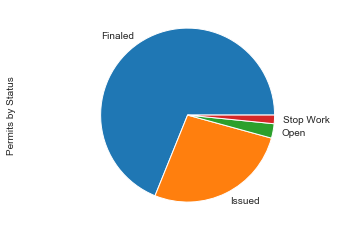

In [20]:
permits_by_status = R1.groupby(R1['Status']).size()
plt.axis('equal') 
permits_by_status.plot(kind='pie', legend=False, label='Permits by Status');

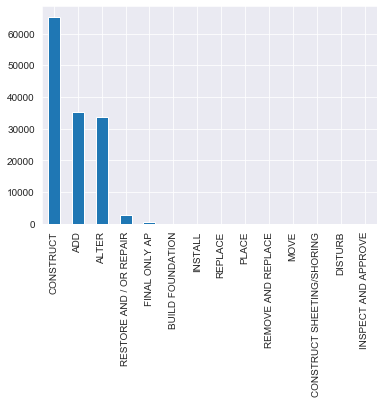

In [21]:
R1['W_type'].value_counts().plot.bar();

In [22]:
R1.Desc.fillna("N/A",inplace =True)

In [23]:
print("Old data frame length:", len(rp), "\nNew data frame length:",  
       len(R1), "\nNumber of rows with at least 1 NA value: ", 
       (len(rp)-len(R1))) 

Old data frame length: 138715 
New data frame length: 137668 
Number of rows with at least 1 NA value:  1047


In [24]:
R1.W_type.value_counts()


CONSTRUCT                     65262
ADD                           35139
ALTER                         33727
RESTORE AND / OR REPAIR        2880
FINAL ONLY AP                   503
BUILD FOUNDATION                 78
INSTALL                          58
REPLACE                           5
PLACE                             3
REMOVE AND REPLACE                2
MOVE                              1
CONSTRUCT SHEETING/SHORING        1
DISTURB                           1
INSPECT AND APPROVE               1
Name: W_type, dtype: int64

In [25]:
R1.Status.value_counts()

Finaled      94841
Issued       36952
Open          3685
Stop Work     2190
Name: Status, dtype: int64

In [26]:
R1.W_type.value_counts()

CONSTRUCT                     65262
ADD                           35139
ALTER                         33727
RESTORE AND / OR REPAIR        2880
FINAL ONLY AP                   503
BUILD FOUNDATION                 78
INSTALL                          58
REPLACE                           5
PLACE                             3
REMOVE AND REPLACE                2
MOVE                              1
CONSTRUCT SHEETING/SHORING        1
DISTURB                           1
INSPECT AND APPROVE               1
Name: W_type, dtype: int64

In [27]:
R1.Decl_v.sum()

10947248297.46

In [28]:
R2 = R1.assign(wait_time = (R1['I_date'] - R1['A_date']).dt.days)


In [29]:
R2['month'] = R2['A_date'].dt.month
R2['year'] = R2['A_date'].dt.year

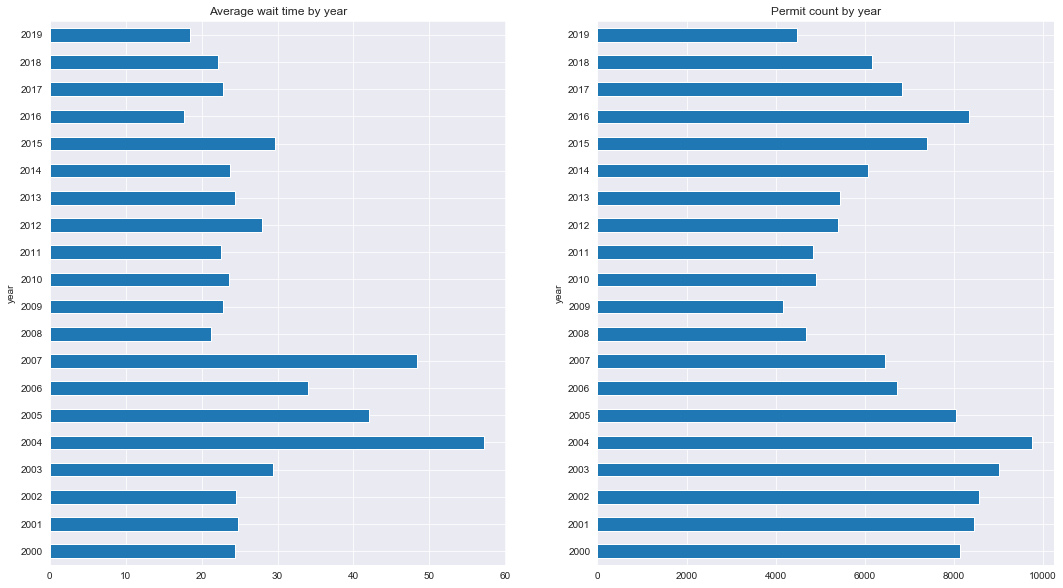

In [30]:
_ = plt.figure(figsize=(18,10))
_ = plt.subplot(1,2,1)
_ = (R2.groupby('year').wait_time.mean()).plot.barh()
_ = plt.title('Average wait time by year')
_ = plt.subplot(1,2,2)
_ = (R2.groupby('year').wait_time.count()).plot.barh()
_ = plt.title('Permit count by year')
#Write a result

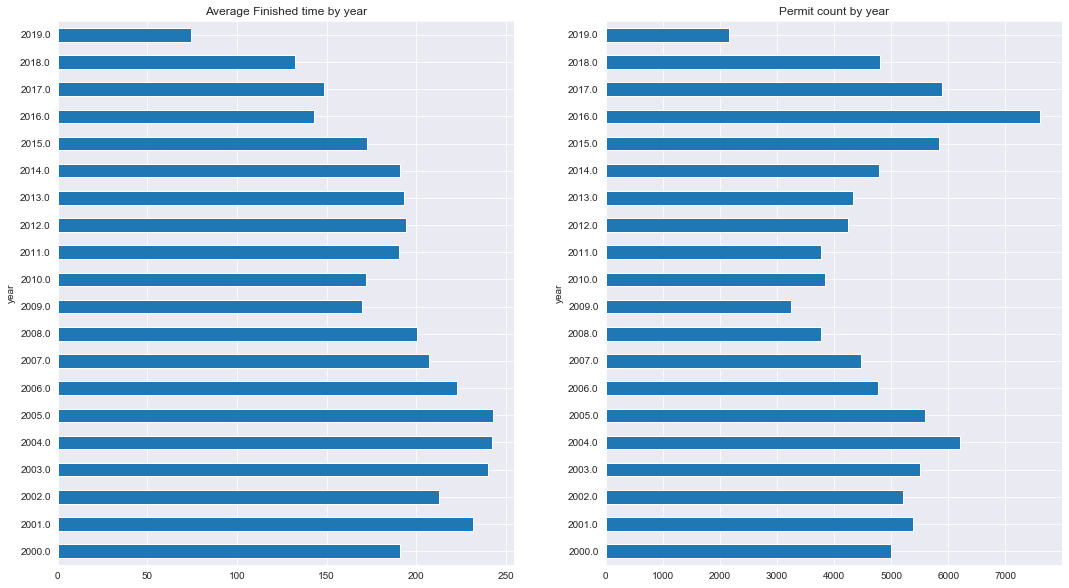

In [31]:
R3 = R1.assign(finished = (R1['F_date'] - R1['I_date']).dt.days)
R3['month'] = R3['I_date'].dt.month
R3['year'] = R3['I_date'].dt.year
_ = plt.figure(figsize=(18,10))
_ = plt.subplot(1,2,1)
_ = (R3.groupby('year').finished.mean()).plot.barh()
_ = plt.title('Average Finished time by year')
_ = plt.subplot(1,2,2)
_ = (R3.groupby('year').finished.count()).plot.barh()
_ = plt.title('Permit count by year')

In [32]:
(R2.groupby('year').wait_time.mean())


year
2000    24.420374
2001    24.836351
2002    24.544564
2003    29.424629
2004    57.229540
2005    41.983743
2006    34.010708
2007    48.379129
2008    21.291702
2009    22.833373
2010    23.588703
2011    22.535153
2012    27.918769
2013    24.459320
2014    23.711817
2015    29.668561
2016    17.737176
2017    22.791691
2018    22.103499
2019    18.485160
Name: wait_time, dtype: float64

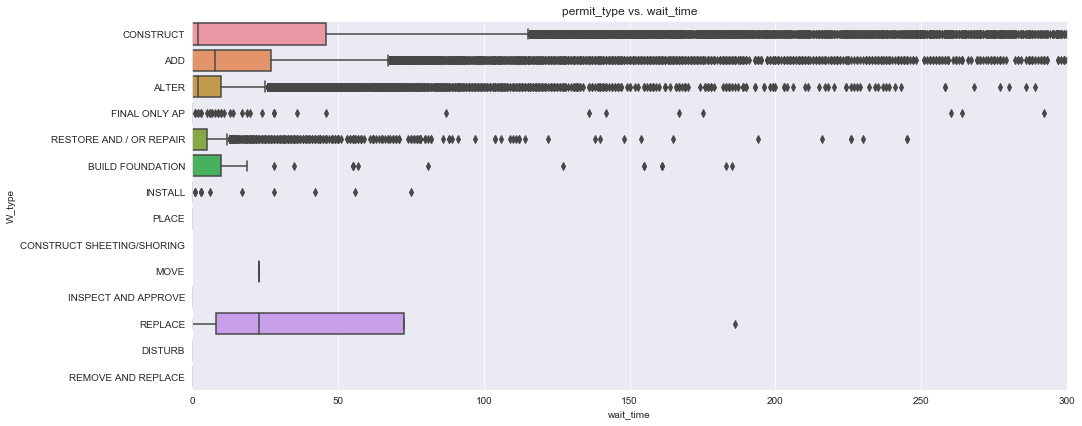

In [33]:
_ = plt.figure(figsize=(15,6))
ax = sns.boxplot(y='W_type', x='wait_time', data = R2, orient = 'h');
plt.title('permit_type vs. wait_time');
plt.tight_layout(pad=1)
plt.xlim(0,300)
plt.show()

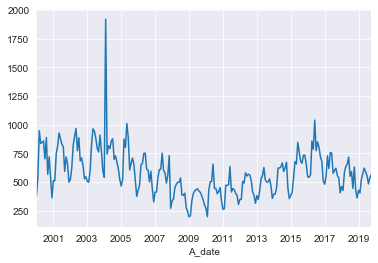

In [34]:
DTime = R2.set_index('A_date')
DTime['num'] = 1
DTime['num'].resample('M').sum().plot();

In [35]:
R2['year'], R2['month'], R2['day_of_week'] = R2.A_date.dt.year, R2.A_date.dt.month, R2.A_date.dt.dayofweek

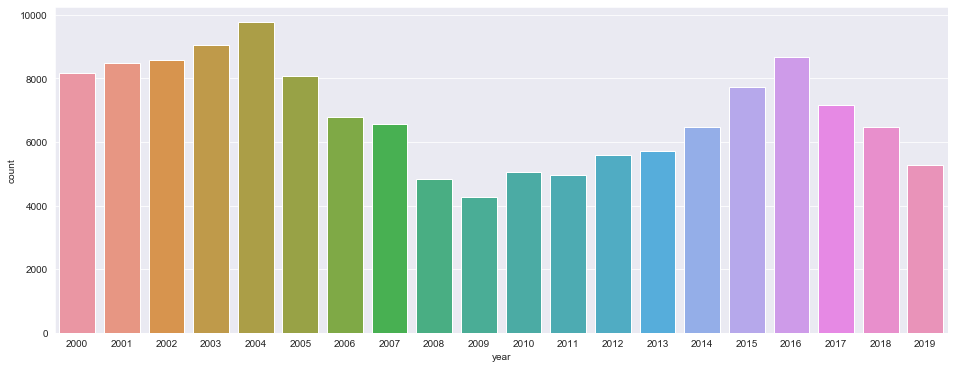

In [36]:
plt.figure(figsize=(16, 6))
sns.countplot(x="year", data=R2);

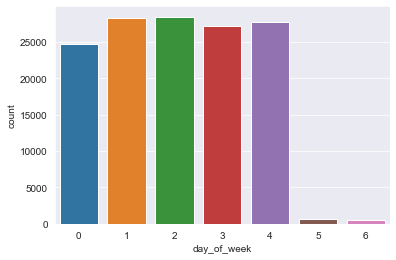

In [37]:
sns.countplot(x="day_of_week", data=R2);

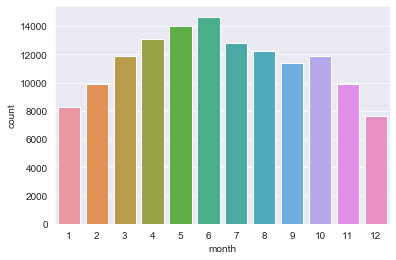

In [38]:
sns.countplot(x="month", data=R2);

In [40]:
R2.groupby('year').P_num.count()

year
2000    8171
2001    8489
2002    8591
2003    9040
2004    9770
2005    8070
2006    6786
2007    6565
2008    4836
2009    4278
2010    5043
2011    4953
2012    5580
2013    5722
2014    6461
2015    7731
2016    8664
2017    7172
2018    6475
2019    5271
Name: P_num, dtype: int64

In [41]:
rp1.iloc[9,14] 

'Customer Wants To Use ePlans,Installation of 17 roof mounted solar panels'

In [42]:
pd.set_option('display.max_columns', 500)

In [43]:
DTime


,P_num,Status,St_num,St_name,St_suf,Post_d,City,State,Zip,I_date,F_date,Building_area,Decl_v,Desc,A_type,W_type,U_code,Pre_d,Location,wait_time,month,year,num
A_date,,,,,,,,,,,,,,,,,,,,,,,
2018-08-25,849824,Finaled,22012,BROADWAY,AVE,N/A,CLARKSBURG,MD,20871.0,2018-10-23,2019-10-08,4894.0,175000.0,Revision 01 - CHANGE HOUSE ELEVATION. THIS O...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,"22012 BROADWAY AVE\nCLARKSBURG, MD 20871\n(39....",59.0,8,2018,1
2018-11-28,859503,Issued,3500,DUPONT,AVE,N/A,KENSINGTON,MD,20895.0,2019-10-08,NaT,3473.0,180000.0,Customer Wants To Use ePlans&nbsp;--existing d...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,"3500 DUPONT AVE\nKENSINGTON, MD 20895\n(39.031...",314.0,11,2018,1
2018-12-20,861649,Issued,5712,RIVER,RD,N/A,BETHESDA,MD,20816.0,2019-03-27,NaT,5273.0,400000.0,"Customer Wants To Use ePlans,Construct new hom...",BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,"5712 RIVER RD\nBETHESDA, MD 20816\n(38.970285,...",97.0,12,2018,1
2019-01-15,863379,Finaled,7312,MAPLE,AVE,N/A,TAKOMA PARK,MD,20912.0,2019-01-22,2019-10-08,392.0,80000.0,New&nbsp;2 story addition on piers built on re...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,"7312 MAPLE AVE\nTAKOMA PARK, MD 20912\n(38.978...",7.0,1,2019,1
2019-08-01,884895,Finaled,15316,DONNA,DR,N/A,SILVER SPRING,MD,20905.0,2019-09-09,2019-10-08,175.0,0.0,DECK:&nbsp; 175 SFSHED:&nbsp; 164 SF,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,DECK,N/A,"15316 DONNA DR\nSILVER SPRING, MD 20905\n(39.1...",39.0,8,2019,1
2019-09-10,889099,Issued,2423,DEXTER,AVE,N/A,SILVER SPRING,MD,20902.0,2019-10-08,NaT,399.0,175000.0,Mixed Work PermitAdd 399sf&nbsp;&nbsp; Front P...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,"2423 DEXTER AVE\nSILVER SPRING, MD 20902\n(39....",28.0,9,2019,1
2019-09-19,890235,Finaled,13000,PEBBLE BEACH,CT,N/A,SILVER SPRING,MD,20904.0,2019-09-19,2019-10-08,300.0,5000.0,Repair &amp; Restore existing deckREPAIR RESTO...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,DECK,N/A,"13000 PEBBLE BEACH CT\nSILVER SPRING, MD 20904...",0.0,9,2019,1
2019-10-01,891457,Issued,601,BRIGHTON KNOLLS,DR,N/A,BRINKLOW,MD,20862.0,2019-10-08,NaT,256.0,10000.0,Screened&nbsp;porch 256 sqft.,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,"601 BRIGHTON KNOLLS DR\nBRINKLOW, MD 20862\n(3...",7.0,10,2019,1
2019-10-08,892221,Issued,2410,KIMBERLY,ST,N/A,SILVER SPRING,MD,20902.0,2019-10-08,NaT,96.0,2800.0,SHED:&nbsp; 96 SQ FT,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SHED,N/A,"2410 KIMBERLY ST\nSILVER SPRING, MD 20902\n(39...",0.0,10,2019,1


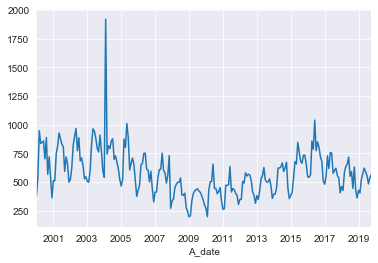

In [44]:
DTime1 = R2.set_index('I_date')
DTime['num'] = 1
DTime['num'].resample('M').sum().plot();

In [45]:
from uszipcode import SearchEngine
>>> search = SearchEngine(simple_zipcode=True)
>>> zipcode = search.by_zipcode("11418")
>>> zipcode.values()

['11418',
 'Standard',
 'Richmond Hill',
 'Richmond Hill, NY',
 ['Richmond Hill', 'Jamaica'],
 'Queens County',
 'NY',
 40.7,
 -73.83,
 'Eastern',
 1.0,
 ['347', '917', '929', '718'],
 36256,
 22201.0,
 1.63,
 0.0,
 11854,
 11031,
 427000,
 60691,
 -73.854747,
 -73.813659,
 40.711641,
 40.689442]

In [46]:
new_location = []
search = SearchEngine(simple_zipcode=True)

for index,row in R2.iterrows():
    current_city = row['Zip']
    zipcode = search.by_zipcode(current_city)
    new_location.append(zipcode.values()[2])

In [47]:
R2['NewCity'] = new_location

In [48]:
for index,row in R2.iterrows():
    if row['NewCity'] != None:
        old = row['City'].lower()
        new = row['NewCity'].lower()
        if old != new:
            print(old,new)

In [49]:
[i*2 for i in R2.P_num]


[1699648,
 1719006,
 1723298,
 1726758,
 1769790,
 1778198,
 1780470,
 1782914,
 1784442,
 1784284,
 1784410,
 1784412,
 1784344,
 1784340,
 1784428,
 1784368,
 1784260,
 1784244,
 1784366,
 1784386,
 1784464,
 1520518,
 1374900,
 1547364,
 1717118,
 1738982,
 1743288,
 1755986,
 1757954,
 1769562,
 1773834,
 1775076,
 1783946,
 1520526,
 1784576,
 1784796,
 1784642,
 1784798,
 1784594,
 1784582,
 1784804,
 1784592,
 1784584,
 1784786,
 1784802,
 1784552,
 1784700,
 1784546,
 1784712,
 1784716,
 1784460,
 1784614,
 1784808,
 1784694,
 1784590,
 1784788,
 1784604,
 1784800,
 1784702,
 1784818,
 1784568,
 1784572,
 1784674,
 1784812,
 1784704,
 1726694,
 1737164,
 1777992,
 1779348,
 1783744,
 1783798,
 1783974,
 1783996,
 1784008,
 1784016,
 1784630,
 1724814,
 1785110,
 1785142,
 1785122,
 1785148,
 1785136,
 1785152,
 1785144,
 1785112,
 1785086,
 1784958,
 1784832,
 1785094,
 1784932,
 1784830,
 1784902,
 1784956,
 1784838,
 1738686,
 1784828,
 1784904,
 1785054,
 1784994,
 1784952,


In [51]:
R2['NewCity'].value_counts() 

Series([], Name: NewCity, dtype: int64)

In [52]:
E2 = R2.Location.str.split("(", n =1, expand = True)
# making separate logitude/ladditude column from new data frame 
R2["Address"]= E2[0] 
  
# making separate Address column from new data frame 
R2["LL"]= E2[1] 
  
# Dropping old Name columns 
R2.drop(columns =["Location"], inplace = True) 
# adding pertheses back in
# df display 
R2 

,P_num,Status,St_num,St_name,St_suf,Post_d,City,State,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,A_type,W_type,U_code,Pre_d,wait_time,month,year,day_of_week,NewCity,Address,LL
0,849824,Finaled,22012,BROADWAY,AVE,N/A,CLARKSBURG,MD,20871.0,2018-08-25,2018-10-23,2019-10-08,4894.0,175000.0,Revision 01 - CHANGE HOUSE ELEVATION. THIS O...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,59.0,8,2018,5,None,"22012 BROADWAY AVE\nCLARKSBURG, MD 20871\n","39.216737, -77.285499)"
1,859503,Issued,3500,DUPONT,AVE,N/A,KENSINGTON,MD,20895.0,2018-11-28,2019-10-08,NaT,3473.0,180000.0,Customer Wants To Use ePlans&nbsp;--existing d...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,314.0,11,2018,2,None,"3500 DUPONT AVE\nKENSINGTON, MD 20895\n","39.031111, -77.070104)"
2,861649,Issued,5712,RIVER,RD,N/A,BETHESDA,MD,20816.0,2018-12-20,2019-03-27,NaT,5273.0,400000.0,"Customer Wants To Use ePlans,Construct new hom...",BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,97.0,12,2018,3,None,"5712 RIVER RD\nBETHESDA, MD 20816\n","38.970285, -77.114498)"
3,863379,Finaled,7312,MAPLE,AVE,N/A,TAKOMA PARK,MD,20912.0,2019-01-15,2019-01-22,2019-10-08,392.0,80000.0,New&nbsp;2 story addition on piers built on re...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,7.0,1,2019,1,None,"7312 MAPLE AVE\nTAKOMA PARK, MD 20912\n","38.97895, -77.011946)"
4,884895,Finaled,15316,DONNA,DR,N/A,SILVER SPRING,MD,20905.0,2019-08-01,2019-09-09,2019-10-08,175.0,0.0,DECK:&nbsp; 175 SFSHED:&nbsp; 164 SF,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,DECK,N/A,39.0,8,2019,3,None,"15316 DONNA DR\nSILVER SPRING, MD 20905\n","39.108283, -76.96135)"
5,889099,Issued,2423,DEXTER,AVE,N/A,SILVER SPRING,MD,20902.0,2019-09-10,2019-10-08,NaT,399.0,175000.0,Mixed Work PermitAdd 399sf&nbsp;&nbsp; Front P...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,28.0,9,2019,1,None,"2423 DEXTER AVE\nSILVER SPRING, MD 20902\n","39.022041, -77.052669)"
6,890235,Finaled,13000,PEBBLE BEACH,CT,N/A,SILVER SPRING,MD,20904.0,2019-09-19,2019-09-19,2019-10-08,300.0,5000.0,Repair &amp; Restore existing deckREPAIR RESTO...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,DECK,N/A,0.0,9,2019,3,None,"13000 PEBBLE BEACH CT\nSILVER SPRING, MD 20904\n","39.069006, -77.02426)"
7,891457,Issued,601,BRIGHTON KNOLLS,DR,N/A,BRINKLOW,MD,20862.0,2019-10-01,2019-10-08,NaT,256.0,10000.0,Screened&nbsp;porch 256 sqft.,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,7.0,10,2019,1,None,"601 BRIGHTON KNOLLS DR\nBRINKLOW, MD 20862\n","39.186387, -77.01964)"
8,892221,Issued,2410,KIMBERLY,ST,N/A,SILVER SPRING,MD,20902.0,2019-10-08,2019-10-08,NaT,96.0,2800.0,SHED:&nbsp; 96 SQ FT,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SHED,N/A,0.0,10,2019,1,None,"2410 KIMBERLY ST\nSILVER SPRING, MD 20902\n","39.031608, -77.05154)"
9,892142,Open,18737,FALLING RIVER,DR,N/A,GAITHERSBURG,MD,20879.0,2019-10-08,NaT,NaT,289.0,17152.0,"Customer Wants To Use ePlans,Installation of 1...",BUILDING RESIDENTIAL PERMIT,ALTER,SINGLE FAMILY DWELLING,N/A,NaN,10,2019,1,None,"18737 FALLING RIVER DR\nGAITHERSBURG, MD 20879\n","39.164636, -77.222052)"


In [53]:
E2 = R2.LL.str.split(",", n =1, expand = True)
# making separate latitude column from new data frame 
R2["Lat"]= E2[0] 
  
# making separate logitude column from new data frame 
R2["Lon"]= E2[1] 

R2["Lat"]= R2.Lat.str.strip('(') 
R2["Lon"]= R2.Lon.str.strip(')') 
R2


,P_num,Status,St_num,St_name,St_suf,Post_d,City,State,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,A_type,W_type,U_code,Pre_d,wait_time,month,year,day_of_week,NewCity,Address,LL,Lat,Lon
0,849824,Finaled,22012,BROADWAY,AVE,N/A,CLARKSBURG,MD,20871.0,2018-08-25,2018-10-23,2019-10-08,4894.0,175000.0,Revision 01 - CHANGE HOUSE ELEVATION. THIS O...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,59.0,8,2018,5,None,"22012 BROADWAY AVE\nCLARKSBURG, MD 20871\n","39.216737, -77.285499)",39.216737,-77.285499
1,859503,Issued,3500,DUPONT,AVE,N/A,KENSINGTON,MD,20895.0,2018-11-28,2019-10-08,NaT,3473.0,180000.0,Customer Wants To Use ePlans&nbsp;--existing d...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,314.0,11,2018,2,None,"3500 DUPONT AVE\nKENSINGTON, MD 20895\n","39.031111, -77.070104)",39.031111,-77.070104
2,861649,Issued,5712,RIVER,RD,N/A,BETHESDA,MD,20816.0,2018-12-20,2019-03-27,NaT,5273.0,400000.0,"Customer Wants To Use ePlans,Construct new hom...",BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,97.0,12,2018,3,None,"5712 RIVER RD\nBETHESDA, MD 20816\n","38.970285, -77.114498)",38.970285,-77.114498
3,863379,Finaled,7312,MAPLE,AVE,N/A,TAKOMA PARK,MD,20912.0,2019-01-15,2019-01-22,2019-10-08,392.0,80000.0,New&nbsp;2 story addition on piers built on re...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,7.0,1,2019,1,None,"7312 MAPLE AVE\nTAKOMA PARK, MD 20912\n","38.97895, -77.011946)",38.97895,-77.011946
4,884895,Finaled,15316,DONNA,DR,N/A,SILVER SPRING,MD,20905.0,2019-08-01,2019-09-09,2019-10-08,175.0,0.0,DECK:&nbsp; 175 SFSHED:&nbsp; 164 SF,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,DECK,N/A,39.0,8,2019,3,None,"15316 DONNA DR\nSILVER SPRING, MD 20905\n","39.108283, -76.96135)",39.108283,-76.96135
5,889099,Issued,2423,DEXTER,AVE,N/A,SILVER SPRING,MD,20902.0,2019-09-10,2019-10-08,NaT,399.0,175000.0,Mixed Work PermitAdd 399sf&nbsp;&nbsp; Front P...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,28.0,9,2019,1,None,"2423 DEXTER AVE\nSILVER SPRING, MD 20902\n","39.022041, -77.052669)",39.022041,-77.052669
6,890235,Finaled,13000,PEBBLE BEACH,CT,N/A,SILVER SPRING,MD,20904.0,2019-09-19,2019-09-19,2019-10-08,300.0,5000.0,Repair &amp; Restore existing deckREPAIR RESTO...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,DECK,N/A,0.0,9,2019,3,None,"13000 PEBBLE BEACH CT\nSILVER SPRING, MD 20904\n","39.069006, -77.02426)",39.069006,-77.02426
7,891457,Issued,601,BRIGHTON KNOLLS,DR,N/A,BRINKLOW,MD,20862.0,2019-10-01,2019-10-08,NaT,256.0,10000.0,Screened&nbsp;porch 256 sqft.,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,7.0,10,2019,1,None,"601 BRIGHTON KNOLLS DR\nBRINKLOW, MD 20862\n","39.186387, -77.01964)",39.186387,-77.01964
8,892221,Issued,2410,KIMBERLY,ST,N/A,SILVER SPRING,MD,20902.0,2019-10-08,2019-10-08,NaT,96.0,2800.0,SHED:&nbsp; 96 SQ FT,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SHED,N/A,0.0,10,2019,1,None,"2410 KIMBERLY ST\nSILVER SPRING, MD 20902\n","39.031608, -77.05154)",39.031608,-77.05154
9,892142,Open,18737,FALLING RIVER,DR,N/A,GAITHERSBURG,MD,20879.0,2019-10-08,NaT,NaT,289.0,17152.0,"Customer Wants To Use ePlans,Installation of 1...",BUILDING RESIDENTIAL PERMIT,ALTER,SINGLE FAMILY DWELLING,N/A,NaN,10,2019,1,None,"18737 FALLING RIVER DR\nGAITHERSBURG, MD 20879\n","39.164636, -77.222052)",39.164636,-77.222052


In [54]:
R2.U_code.value_counts()
S1 = R2.loc[R1.W_type=='CONSTRUCT']
S1.U_code.value_counts()
#Deck
S2 = S1.loc[S1.U_code =='SINGLE FAMILY DWELLING']

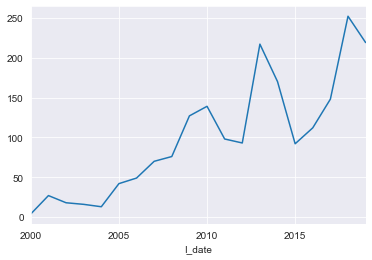

In [55]:
#Housing 
Th = S2.loc[(S2.Desc.str.contains("new", case=False))]
Th = Th.set_index('I_date')
Th['num'] = 1
Th['num'].resample('Y').sum().plot();
Th.reset_index()
Th.to_csv("wp")


In [56]:
T2 = S2.loc[(S2.Desc.str.contains("revision", case=False))]
T2

,P_num,Status,St_num,St_name,St_suf,Post_d,City,State,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,A_type,W_type,U_code,Pre_d,wait_time,month,year,day_of_week,NewCity,Address,LL,Lat,Lon
0,849824,Finaled,22012,BROADWAY,AVE,N/A,CLARKSBURG,MD,20871.0,2018-08-25,2018-10-23,2019-10-08,4894.0,175000.0,Revision 01 - CHANGE HOUSE ELEVATION. THIS O...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,59.0,8,2018,5,None,"22012 BROADWAY AVE\nCLARKSBURG, MD 20871\n","39.216737, -77.285499)",39.216737,-77.285499
22,687450,Issued,133,NORWOOD,RD,N/A,SILVER SPRING,MD,20905.0,2014-09-11,2014-11-12,NaT,10141.0,530000.0,DEMOLITION/REBUILD *REVISION SUBMITTED 6/9/17-...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,62.0,9,2014,3,None,"133 NORWOOD RD\nSILVER SPRING, MD 20905\n","39.109887, -77.007329)",39.109887,-77.007329
23,773682,Finaled,9108,BURNING TREE,RD,N/A,BETHESDA,MD,20817.0,2016-09-23,2016-11-16,2019-10-09,12760.0,1300000.0,DEMOLITION/REBUILD Deck = 850.0 SF REVISION su...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,54.0,9,2016,4,None,"9108 BURNING TREE RD\nBETHESDA, MD 20817\n","39.005912, -77.136017)",39.005912,-77.136017
306,883964,Issued,2852,SEABISCUIT,DR,N/A,OLNEY,MD,20832.0,2019-07-24,2019-08-21,NaT,6522.0,300000.0,"Revision 883964 - moved bsmt door, added exter...",BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,28.0,7,2019,2,None,"2852 SEABISCUIT DR\nOLNEY, MD 20832\n","39.128015, -77.060953)",39.128015,-77.060953
1031,451998,Finaled,6000,LANDON,LN,N/A,BETHESDA,MD,20817.0,2007-04-30,2007-06-14,2008-04-23,7424.0,400000.0,Demo/Rebuild//Revision 09/07/2007 Structural,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,45.0,4,2007,0,None,"6000 LANDON LN\nBETHESDA, MD 20817\n","38.987112, -77.121076)",38.987112,-77.121076
1241,409525,Finaled,18720,BROOKE,RD,N/A,BRINKLOW,MD,20862.0,2006-01-19,2006-03-09,2006-08-24,8544.0,135000.0,Model:Mt. Vernon / site plan revision 6/22/06 ...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,49.0,1,2006,3,None,"18720 BROOKE RD\nBRINKLOW, MD 20862\n","39.165507, -77.018149)",39.165507,-77.018149
1293,752711,Finaled,11823,PEPPERVINE,DR,N/A,CLARKSBURG,MD,20871.0,2016-04-22,2016-05-31,2016-09-22,6804.0,175000.0,Revision 1 - REVISE REAR SET BACK FROM 30' TO ...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,39.0,4,2016,4,None,"11823 PEPPERVINE DR\nCLARKSBURG, MD 20871\n","39.229821, -77.241721)",39.229821,-77.241721
1403,232099,Issued,14211,SCHAEFFER,RD,N/A,BOYDS,MD,20841.0,2000-10-11,2000-10-31,NaT,4016.0,75000.0,HOUSE TYPE/REVISION-OVERTON III,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,20.0,10,2000,2,None,"14211 SCHAEFFER RD\nBOYDS, MD 20841\n","39.152689, -77.295693)",39.152689,-77.295693
1511,346628,Finaled,10440,DEMOCRACY,LN,N/A,POTOMAC,MD,20854.0,2004-06-02,2004-06-22,2004-07-20,10000.0,0.0,"For """"Final"""" only. Revision to 9806230063, a...",BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,20.0,6,2004,2,None,"10440 DEMOCRACY LN\nPOTOMAC, MD 20854\n","39.026796, -77.166064)",39.026796,-77.166064
1599,344425,Finaled,2423,WESTMINSTER,DR,N/A,SILVER SPRING,MD,20906.0,2004-05-14,2004-06-03,2005-06-10,5610.0,311038.0,House Type Change\nRevision to 303243\nNo Chan...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,20.0,5,2004,4,None,"2423 WESTMINSTER DR\nSILVER SPRING, MD 20906\n","39.097776, -77.052109)",39.097776,-77.052109


# Solar Panels


In [57]:
SP= R2.loc[(R2.Desc.str.contains("solar panel", case=False)) & (R2.Desc.str.contains("install", case=False))]
#R2.Desc.str.contains(r'(?=.*Solar Panel)(?=.*Install)',regex=True)

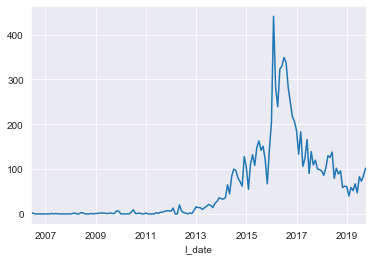

In [58]:
SP2Time = SP.set_index('I_date')
SP2Time['num'] = 1
SP2Time['num'].resample('M').sum().plot();
#Spike and drop after 2015

In [59]:
SP2Time.reset_index()
SP2Time.to_csv('tr')

In [60]:
T3 = S2.loc[(S2.Desc.str.contains("extension", case=False))]
T3

,P_num,Status,St_num,St_name,St_suf,Post_d,City,State,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,A_type,W_type,U_code,Pre_d,wait_time,month,year,day_of_week,NewCity,Address,LL,Lat,Lon
2361,525010,Finaled,10111,NORTON,RD,N/A,POTOMAC,MD,20854.0,2009-11-05,2010-05-06,2013-06-05,32000.0,9000000.0,HOUSE TYPE CHANGE (original permit #491794) re...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,182.0,11,2009,3,None,"10111 NORTON RD\nPOTOMAC, MD 20854\n","39.02722, -77.217464)",39.02722,-77.217464
4375,537321,Finaled,10111,NORTON,RD,N/A,POTOMAC,MD,20854.0,2010-05-07,2011-04-25,2013-02-13,5231.0,700000.0,Guest House\n\nEXTENSION GRANTED UNTIL 5/16/13,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,353.0,5,2010,4,None,"10111 NORTON RD\nPOTOMAC, MD 20854\n","39.02722, -77.217464)",39.02722,-77.217464
4827,273403,Finaled,9121,PERSIMMON TREE,RD,N/A,POTOMAC,MD,20854.0,2002-04-01,2002-08-01,2005-04-04,10000.0,450000.0,customer requests a six month extension on per...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,122.0,4,2002,0,None,"9121 PERSIMMON TREE RD\nPOTOMAC, MD 20854\n","39.006336, -77.199823)",39.006336,-77.199823
6318,527200,Finaled,3821,BRADLEY,LN,N/A,CHEVY CHASE,MD,20815.0,2009-12-08,2010-07-01,2012-06-05,6243.0,420000.0,CONSTRUCT NEW HOME ON VACANT LOT *** revision ...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,205.0,12,2009,1,None,"3821 BRADLEY LN\nCHEVY CHASE, MD 20815\n","38.976674, -77.076436)",38.976674,-77.076436
7282,786809,Finaled,6509,ELGIN,LN,N/A,BETHESDA,MD,20817.0,2017-01-18,2017-03-15,2018-07-03,7219.0,400000.0,DEMOLITION/REBUILDExtension 03/26/2018 to 09/2...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,56.0,1,2017,2,None,"6509 ELGIN LN\nBETHESDA, MD 20817\n","38.975666, -77.132934)",38.975666,-77.132934
9831,360022,Finaled,10300,RIVERWOOD,DR,N/A,POTOMAC,MD,20854.0,2004-09-30,2004-09-30,2005-06-10,5001.0,500000.0,extension to permit 304147 only,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,0.0,9,2004,3,None,"10300 RIVERWOOD DR\nPOTOMAC, MD 20854\n","39.025233, -77.227507)",39.025233,-77.227507
10473,471918,Finaled,10904,BRENT,RD,N/A,POTOMAC,MD,20854.0,2007-11-23,2008-08-05,2013-01-30,13556.0,700000.0,EXTENDED 10/19/2010 (MD State Law section 334)...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,256.0,11,2007,4,None,"10904 BRENT RD\nPOTOMAC, MD 20854\n","39.000479, -77.218635)",39.000479,-77.218635
11857,765001,Finaled,12345,JUNIPER BLOSSOM,PL,N/A,CLARKSBURG,MD,20871.0,2016-07-21,2016-09-12,2017-12-08,5596.0,175000.0,Revision 01 - REMOVE 4' EXTENSION - CHANGE SET...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,53.0,7,2016,3,None,"12345 JUNIPER BLOSSOM PL\nCLARKSBURG, MD 20871\n","39.22531, -77.251901)",39.22531,-77.251901
12799,616833,Stop Work,11889,CHESTNUT BRANCH,WAY,N/A,CLARKSBURG,MD,20871.0,2012-11-06,2012-12-14,2013-05-06,4257.0,300000.0,MODEL: NEW WINDSOR with 4' Extension (refer ba...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,38.0,11,2012,1,None,"11889 CHESTNUT BRANCH WAY\nCLARKSBURG, MD 20871\n","39.227897, -77.246722)",39.227897,-77.246722
13297,735662,Finaled,9313,WINTERSET,DR,N/A,POTOMAC,MD,20854.0,2015-11-10,2015-12-10,2016-07-06,6795.0,400000.0,"refer back --Oakton Model==Elevation #7, 4' re...",BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,30.0,11,2015,1,None,"9313 WINTERSET DR\nPOTOMAC, MD 20854\n","39.048513, -77.191435)",39.048513,-77.191435


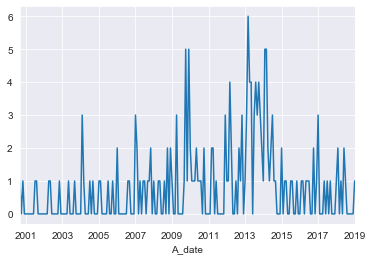

In [61]:
D2Time = T3.set_index('A_date')
D2Time['num'] = 1
D2Time['num'].resample('M').sum().plot();

In [62]:
R2.loc[(R2.Desc.str.contains("extension", case=False))]

,P_num,Status,St_num,St_name,St_suf,Post_d,City,State,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,A_type,W_type,U_code,Pre_d,wait_time,month,year,day_of_week,NewCity,Address,LL,Lat,Lon
57,892400,Open,15531,RADWICK,LN,N/A,SILVER SPRING,MD,20906.0,2019-10-09,NaT,NaT,847.0,80000.0,"Customer Wants To Use ePlans,Interior stair al...",BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,NaN,10,2019,2,None,"15531 RADWICK LN\nSILVER SPRING, MD 20906\n","39.110334, -77.05403)",39.110334,-77.05403
368,893737,Open,936,CLINTWOOD,DR,N/A,SILVER SPRING,MD,20902.0,2019-10-21,NaT,NaT,797.0,285000.0,"Customer Wants To Use ePlans,Addition of maste...",BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,NaN,10,2019,0,None,"936 CLINTWOOD DR\nSILVER SPRING, MD 20902\n","39.048306, -77.028989)",39.048306,-77.028989
457,894148,Open,613,KEMP MILL FOREST,DR,N/A,SILVER SPRING,MD,20902.0,2019-10-24,NaT,NaT,678.0,50000.0,add exercise room and kitchen extension 678 sq...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,NaN,10,2019,3,None,"613 KEMP MILL FOREST DR\nSILVER SPRING, MD 209...","39.055648, -77.022089)",39.055648,-77.022089
1757,512741,Finaled,11500,KAREN,DR,N/A,POTOMAC,MD,20854.0,2009-06-01,2009-07-08,2010-07-14,1661.0,125000.0,ADDITION: Second story (855-sqft) and Garage 8...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,37.0,6,2009,0,None,"11500 KAREN DR\nPOTOMAC, MD 20854\n","39.044574, -77.188243)",39.044574,-77.188243
2033,241115,Finaled,20621,PLUM CREEK,CT,N/A,GAITHERSBURG,MD,20882.0,2001-02-21,2001-02-21,2001-06-04,288.0,22000.0,PORCH EXTENSION & ENCLOSURE,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,0.0,2,2001,2,None,"20621 PLUM CREEK CT\nGAITHERSBURG, MD 20882\n","39.195506, -77.17404)",39.195506,-77.17404
2361,525010,Finaled,10111,NORTON,RD,N/A,POTOMAC,MD,20854.0,2009-11-05,2010-05-06,2013-06-05,32000.0,9000000.0,HOUSE TYPE CHANGE (original permit #491794) re...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,182.0,11,2009,3,None,"10111 NORTON RD\nPOTOMAC, MD 20854\n","39.02722, -77.217464)",39.02722,-77.217464
3311,730028,Finaled,9120,WOODEN BRIDGE,RD,N/A,POTOMAC,MD,20854.0,2015-09-28,2015-10-07,2017-12-14,420.0,100000.0,adding small family room in rear of home\n\nWo...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,9.0,9,2015,0,None,"9120 WOODEN BRIDGE RD\nPOTOMAC, MD 20854\n","39.063301, -77.188199)",39.063301,-77.188199
3597,768779,Finaled,7409,ARGUS,CT,N/A,GAITHERSBURG,MD,20879.0,2016-08-18,2016-11-02,2017-07-28,390.6,31000.0,adding Kitchen extension,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,N/A,76.0,8,2016,3,None,"7409 ARGUS CT\nGAITHERSBURG, MD 20879\n","39.179861, -77.15526)",39.179861,-77.15526
4375,537321,Finaled,10111,NORTON,RD,N/A,POTOMAC,MD,20854.0,2010-05-07,2011-04-25,2013-02-13,5231.0,700000.0,Guest House\n\nEXTENSION GRANTED UNTIL 5/16/13,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,N/A,353.0,5,2010,4,None,"10111 NORTON RD\nPOTOMAC, MD 20854\n","39.02722, -77.217464)",39.02722,-77.217464
4636,514433,Finaled,9024,COPENHAVER,DR,N/A,POTOMAC,MD,20854.0,2009-06-22,2009-06-26,2009-09-18,100.0,25000.0,shed dormer extension *Revision 07/09/2009 str...,BUILDING RESIDENTIAL PERMIT,ALTER,SINGLE FAMILY DWELLING,N/A,4.0,6,2009,0,None,"9024 COPENHAVER DR\nPOTOMAC, MD 20854\n","39.056976, -77.18567)",39.056976,-77.18567


In [63]:
SP['City'].value_counts()

SILVER SPRING         3327
GAITHERSBURG          1078
GERMANTOWN             925
ROCKVILLE              893
BETHESDA               454
CLARKSBURG             423
MONTGOMERY VILLAGE     401
OLNEY                  391
POTOMAC                297
BURTONSVILLE           239
BOYDS                  209
DAMASCUS               184
KENSINGTON             168
TAKOMA PARK            157
BROOKEVILLE            136
CHEVY CHASE             99
POOLESVILLE             89
DICKERSON               29
SANDY SPRING            25
CABIN JOHN              24
ASHTON                  21
SPENCERVILLE            15
WASHINGTON GROVE         7
GARRETT PARK             6
BRINKLOW                 5
LAUREL                   5
DARNESTOWN               2
BEALLSVILLE              2
GLEN ECHO                1
BARNESVILLE              1
MOUNT AIRY               1
Name: City, dtype: int64

# Maps

#link for housing map
https://public.tableau.com/profile/abraham.lewis#!/vizhome/Book1_15754944071890/Sheet5